# Goal for this Notebook:

Use analysis tools provided in Python to interpret the different musical characteristics from songs in Spotify database and how these characteristics influence the popularity factor associated with the song. We also reviewed songs on the Billboard Hot 100 list to compare to the data in the Spotify database. 

Data Handling
    Importing Data with Pandas
    Cleaning Data
    Exploring Data through Visualizations with Matplotlib
    
 Data Analysis
     Regression Models

# Motivation & Summary

For this project we decided to investigate a song’s popularity and if/how there are defining characteristics that make a particular song more popular than another.  

Our initial hypothesis is particular musical characteristics are direct correlators with a song’s popularity and based on these connections we can devise a prediction model to predict whether or not a song is popular.

In order to build our model we needed to analyze a population of songs and their musical characteristics. Where would 
we find a dataset that contained this info?

We discovered a dataset on Kaggle that contains 232,725 tracks pulled from Spotify’s music database via the Spotify API. The songs come from 26 different genres and the dataset also provided 14 different explanatory variables based on the song’s musical characteristics 

We did use the “popularity” variable in the dataset as our targeted dependent variable.

After exploring and running statistical models based on the data provided in the Spotify dataset, we were unable to find direct correlations between the inputs of the explanatory variables and the out of the song’s popularity. There was no significant correlation between any of the musical characteristics and the popularity variable. 

Therefore, we decided to move a different direction and conduct a couple different experiments help us define a model for measuring/predicting popularity among songs.

In [6]:
# Dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns
sns.set(style="ticks")

In [7]:
# Read in the data

data = pd.read_csv("../Resources/SpotifyFeatures.csv")

In [8]:
# View the header of the data
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Questions & Data

The main questions we focused on were “what are the measurable characteristics of a song that we can use to help explain the popularity”?

As mentioned earlier, we did discover the dataset built from the Spotify API that contained the very explanatory variables we believed would tell the story of song popularity. The Spotify API is a public resource for developers to use to mine through Spotify’s music library. The library is built of the song info such as artist name, genre and track name but also contains the data on the song’s musical characteristics. The Spotify API defines the features as the following:
    
    Key: Estimate of what key the song is in
    
    Mode: Estimate of what the mode of the song is in
    
    Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
    
    Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

    Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
   
   Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
    
    Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
    
    Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
    
    Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.


# Cleaning the Data and Data Exploration/Visual Analysis

For the purpose of this analysis we are trying to judge song popularity based on musical attributes. After reviewing the different genres within the set we decided to remove the genres that did not coincide with musical characteristics or are not considered contemporary popular genres. Therefore we need to clean some of the genres out of the data.

In [9]:
new_data = data[(data.genre != 'Comedy') & (data.genre != 'Soundtrack') & (data.genre != 'Children’s Music') & (data.genre != 'Classical') & (data.genre != 'Anime') & (data.genre != 'Opera') & (data.genre != 'Movie') & (data.genre != "Children's Music") & (data.genre != "A Capella")]

Now that we have removed the extraneous genres, we ran the basic statistics for the entire datset and isolating the popularity factor on the updated data set.

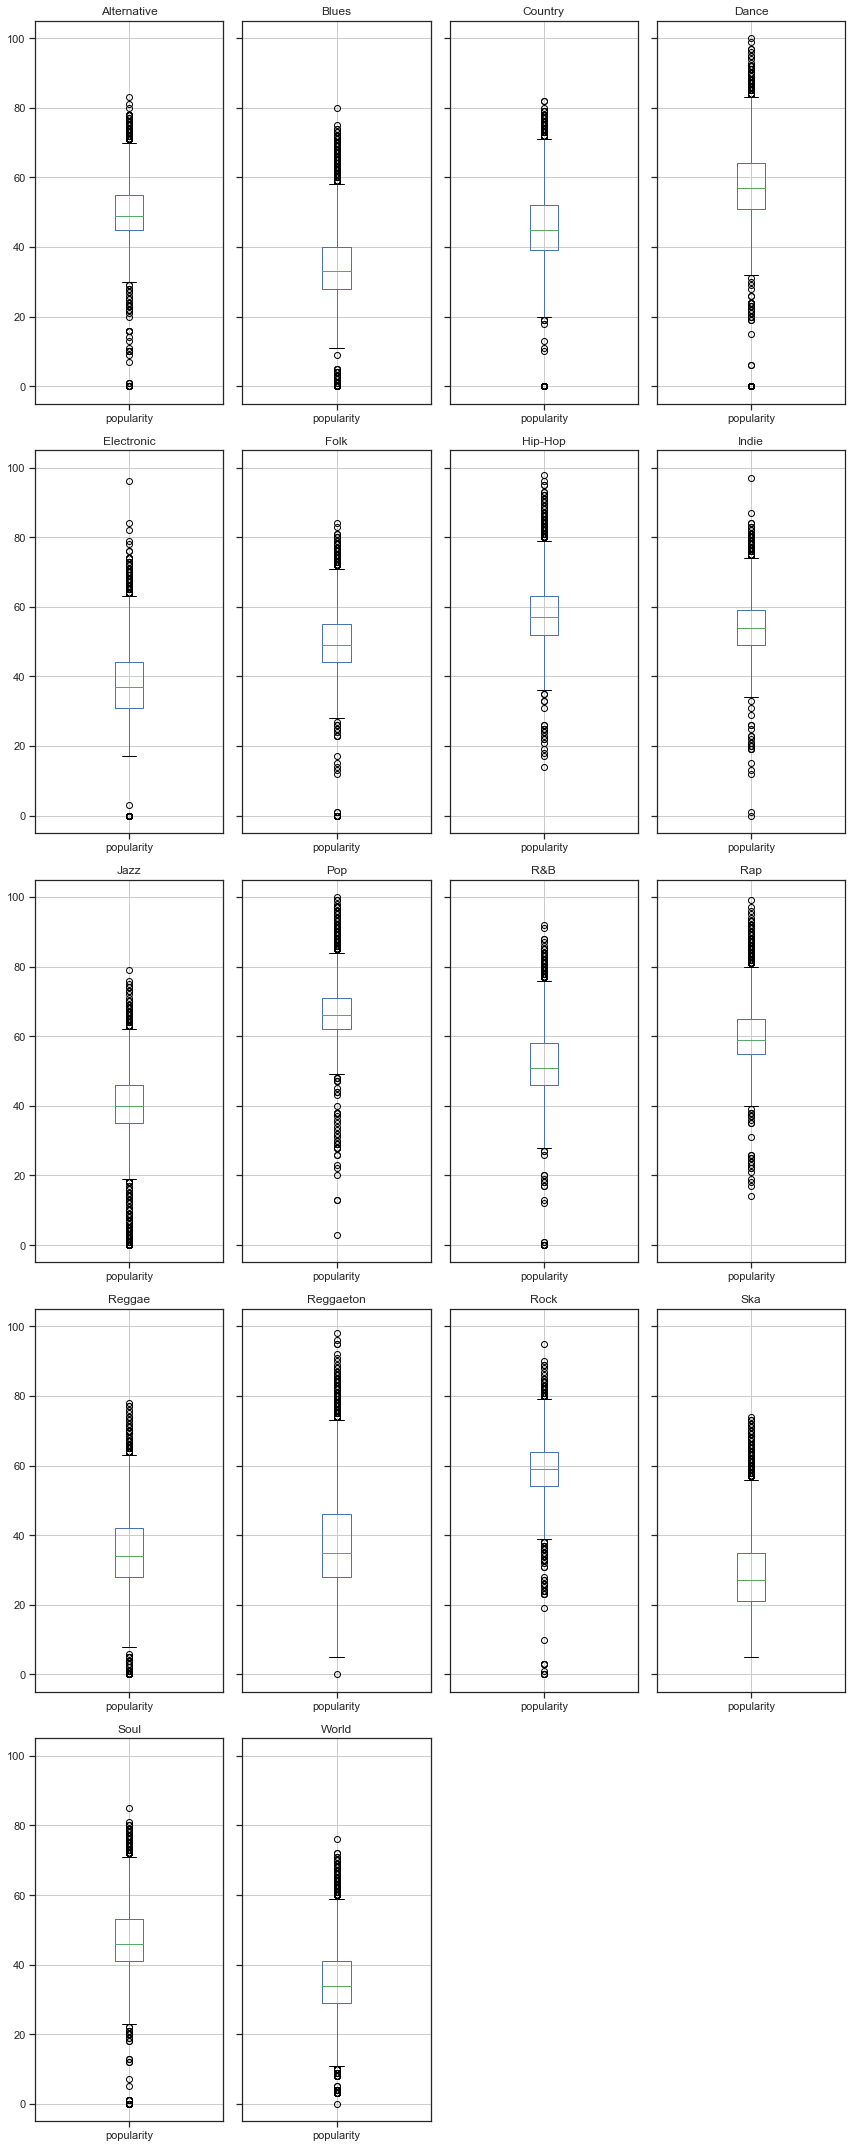

In [10]:
new_data.groupby('genre').boxplot(column=['popularity'], figsize=(12,30))
plt.tight_layout()
fig1 = plt.gcf()
plt.show()
fig1.savefig("Boxchart.png", bbox_inches='tight', dpi=100)

The above results show the 50% threshold for popularity falls at a score of 48. Since the goal of this analysis is to find what characteristics attribute to popularity score, we decided to break the data into two groups. The first group is the "unpopular" group made up of songs with popularity scores less than 48. The "popular" group is the second group made up of songs with scores 48 or higher in popularity. We break up the data into the 2 groups below. 

In [11]:
new_data['popularity'].describe()

count    164245.000000
mean         47.542878
std          14.162002
min           0.000000
25%          38.000000
50%          48.000000
75%          58.000000
max         100.000000
Name: popularity, dtype: float64

In [12]:
pop_data_unpop = new_data.loc[new_data['popularity'] < 48]
pop_data_pop = new_data.loc[new_data['popularity'] >= 48]

Now we take a look at the distribution of the genres in each group below by looking at the value counts and then using that info in pie charts.

We can now see that the frequencies of genres appear inverses among the two groups. We can see that the Pop genre is the most frequent in the popular group but least frequent in the unpopular group and Ska is the most frequent in the unpopular group but least frequent in the unpopular group. This is important because it shows there is variability across the popularity scores among the genres.

We then decided to focus on the top 5 frequent genres for each group to focus our analysis. We chose Ska, Blues, World, Electronic, and Reggae for the unpopular group and Pop, Rap, Rock, Hip-Hop and Indie from the popular group.

To review the spread of the popularity scores among each of the genres, we plotted them using boxplots to show each genre's "popularity" score statistics as shown below.

In order to keep the charts cleaner, we only left the top 5 genres of each.

In [13]:
pop_data_unpop['genre'].value_counts() 
pop_data_unpop_genre = pop_data_unpop.loc[(pop_data_unpop['genre'] == 'Ska') | (pop_data_unpop['genre'] == 'Blues') | 
                                         (pop_data_unpop['genre'] == 'World') | (pop_data_unpop['genre'] == 'Electronic') |
                                         (pop_data_unpop['genre'] == 'Reggae')]

pop_data_pop['genre'].value_counts()
pop_data_pop_genre = pop_data_pop.loc[(pop_data_pop['genre'] == 'Pop') | (pop_data_pop['genre'] == 'Rap') | 
                                         (pop_data_pop['genre'] == 'Rock') | (pop_data_pop['genre'] == 'Hip-Hop') |
                                         (pop_data_pop['genre'] == 'Indie')]

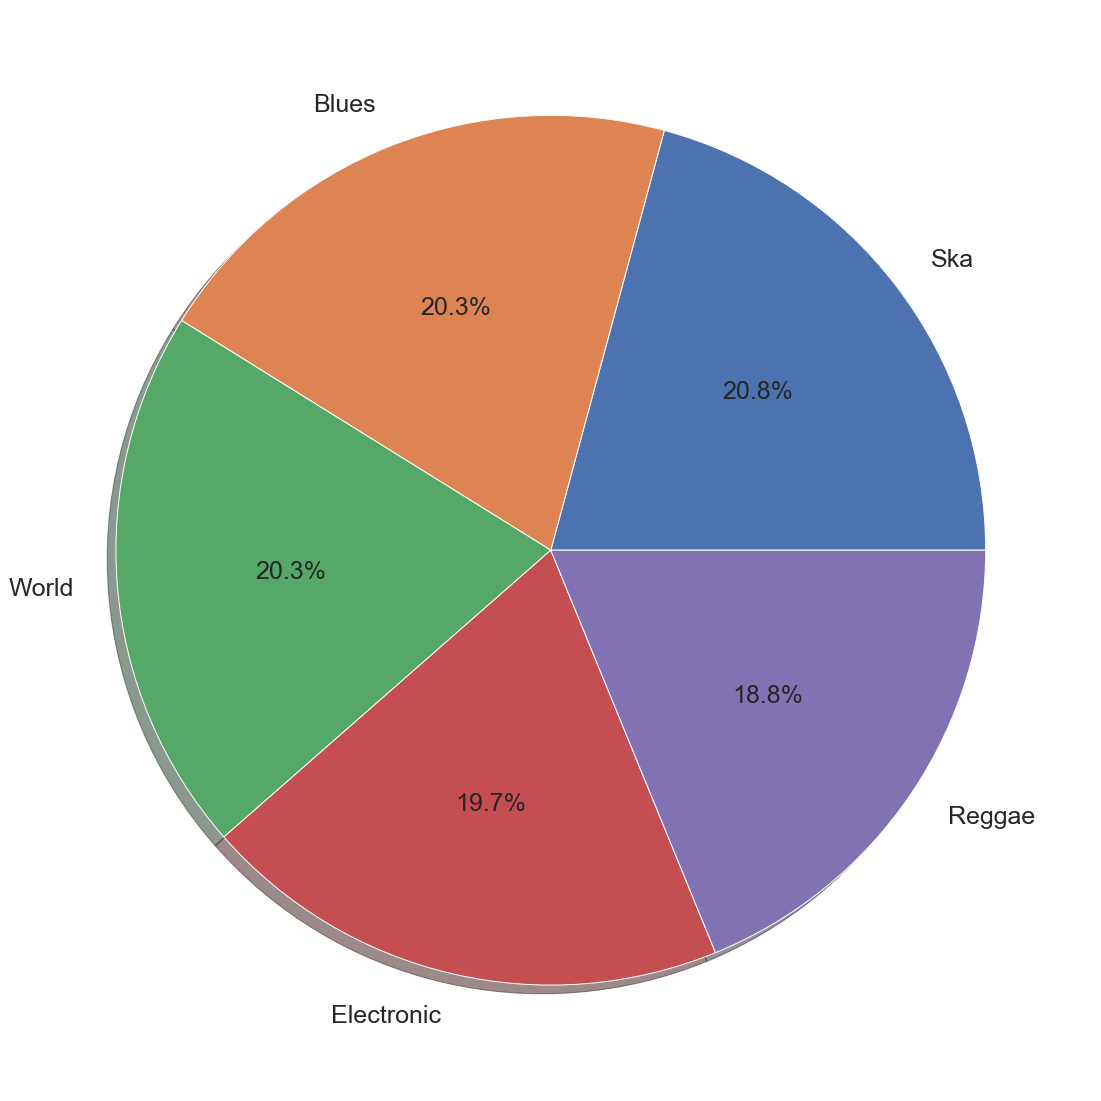

In [14]:
plt.figure(figsize = (20,20))
genre_count_unpop = pop_data_unpop_genre['genre'].value_counts()
genre_names = genre_count_unpop.index
plt.pie(genre_count_unpop,labels=genre_names, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 25})
fig2 = plt.gcf()
plt.show()
fig2.savefig('Unpopular_Pie.png', dpi=100)

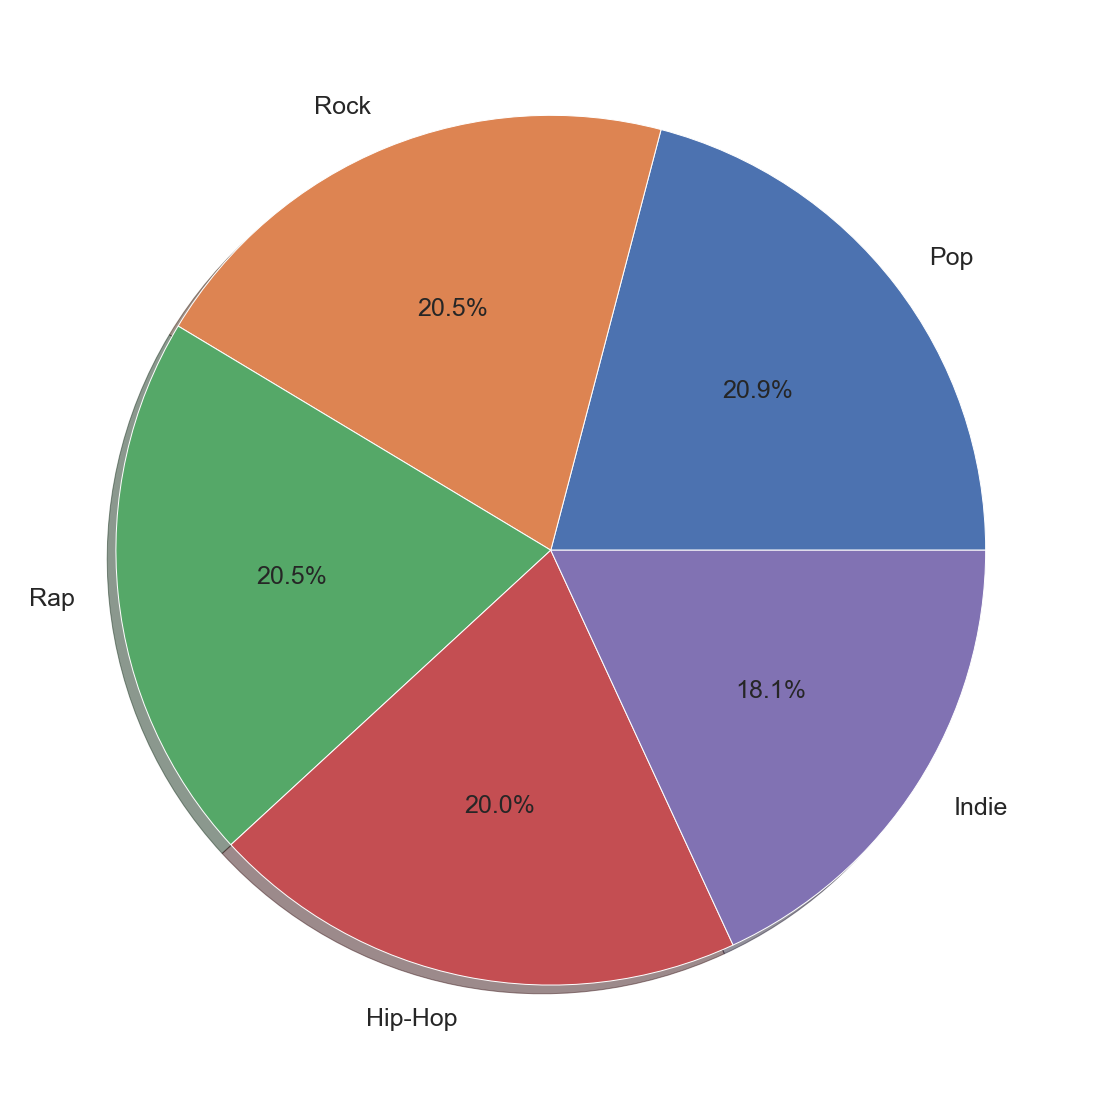

In [15]:
plt.figure(figsize = (20,20))
genre_count_pop = pop_data_pop_genre['genre'].value_counts()
genre_names = genre_count_pop.index
plt.pie(genre_count_pop,labels=genre_names, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 25})
fig3 = plt.gcf()
plt.show()
fig3.savefig('Popular_Pie.png', dpi=100)

As we continue to review the data we notice that some of the columns are made of categorical data rather than numerical data. One of these categorical characteristics is the Key column that represents the key in which the song is in. To get a better idea of variability of the different keys across the two groups, we used a bar chart to show the frequencies of each key in both the popular and unpopular groups. 

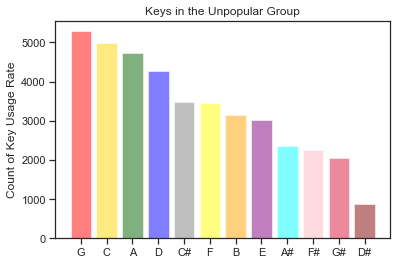

In [16]:
keys_unpop = pop_data_unpop_genre['key'].value_counts()
names = ['G', 'C', 'A', 'D', 'C#', 'F', 'B', 'E', 'A#', 'F#', 'G#', 'D#']
my_colors = ['red', 'gold', 'darkgreen', 'blue', 'grey', 'yellow', 'orange', 'purple', 'aqua', 'lightpink', 'crimson', 'maroon']

plt.bar(names, keys_unpop, align='center', alpha=0.5,color=my_colors)
plt.xticks(names)
plt.ylabel('Count of Key Usage Rate')
plt.title('Keys in the Unpopular Group')
fig4 = plt.gcf()
plt.show()
fig4.savefig('Keys_Unpopular.png', dpi=100)

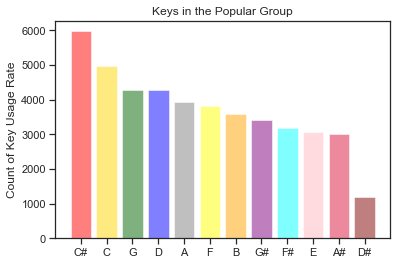

In [17]:
keys_pop = pop_data_pop_genre['key'].value_counts()
names = ['C#', 'C', 'G', 'D', 'A', 'F', 'B', 'G#', 'F#', 'E', 'A#', 'D#']
my_colors = ['red', 'gold', 'darkgreen', 'blue', 'grey', 'yellow', 'orange', 'purple', 'aqua', 'lightpink', 'crimson', 'maroon']

plt.bar(names, keys_pop, align='center', alpha=0.5,color=my_colors)
plt.xticks(names)
plt.ylabel('Count of Key Usage Rate')
plt.title('Keys in the Popular Group')
fig5 = plt.gcf()
plt.show()
fig5.savefig('Keys_Popular.png', dpi=100)

As we can see, the majority of the songs in the unpopular group are in the key of G whereas the majority of songs in the popular group are in the key of C#. This could lead us to believe that songs in the key of C# have a better chance of being considered popular. 

# Data Analysis

Now that we have visualized some of the variability in the dataset, we want to see if we can build a model based on the musical characteristics that determine the popularity factor of a song. In order to do so, we decided to start with regression analysis to see what characteristics correlate with popularity across the popular and unpopular groups. We started with some matrix plots and correlation heat map to see where the strongest correlations may be found.

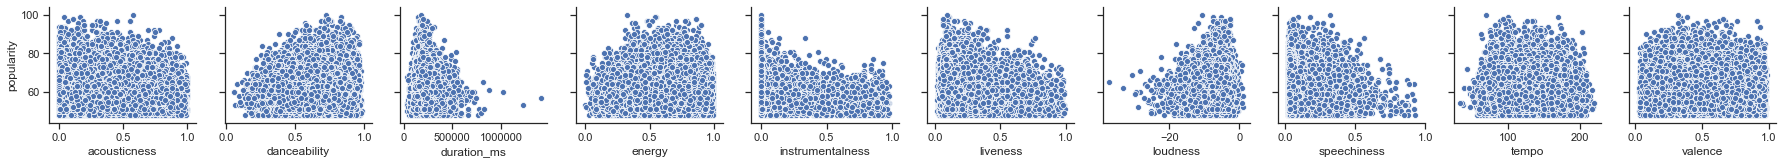

In [18]:
sns_plot_one = sns.pairplot(pop_data_pop_genre,
            x_vars = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence'],
            y_vars = ['popularity'])
sns_plot_one.savefig("Popular_Correlation.png")

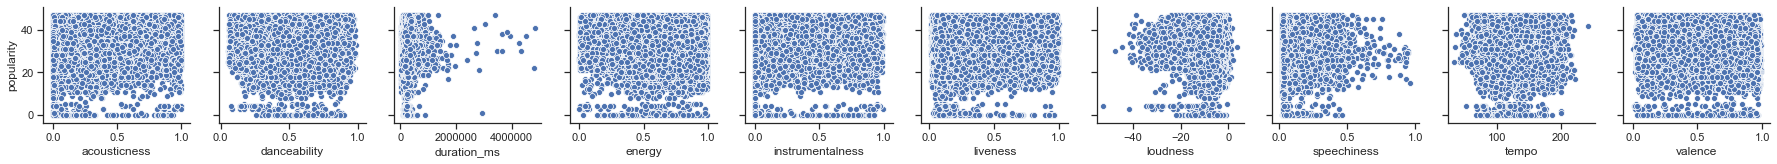

In [19]:
sns_plot_two = sns.pairplot(pop_data_unpop_genre,
            x_vars = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence'],
            y_vars = ['popularity'])
sns_plot_two.savefig("Unpopular_Correlation.png")

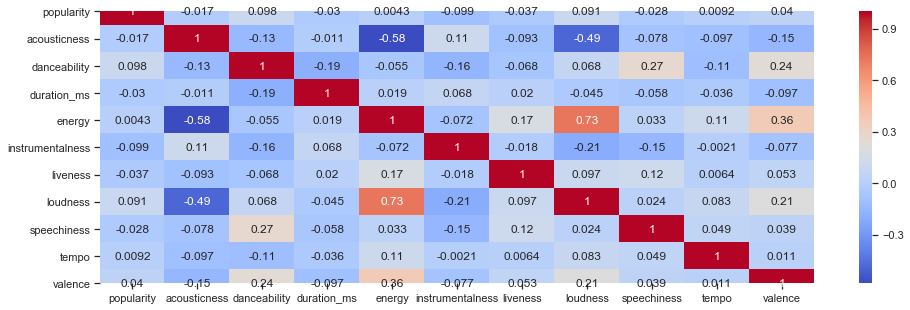

In [20]:
plt.figure(figsize = (16,5))
sns.heatmap(pop_data_pop_genre.corr(), cmap="coolwarm", annot=True)
fig6 = plt.gcf()
plt.show()
fig6.savefig('Popular_Heat.png', dpi=100)

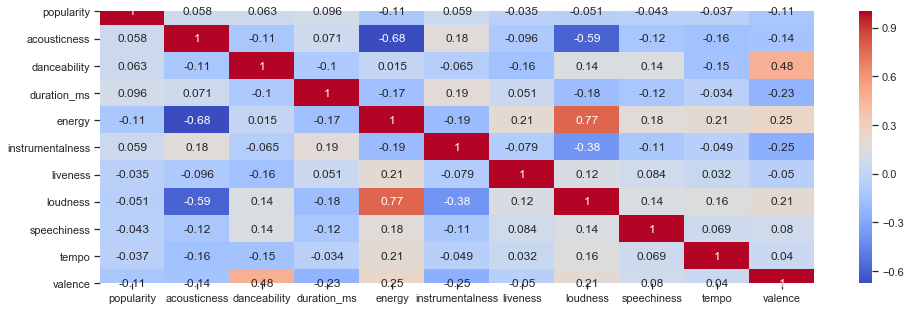

In [21]:
plt.figure(figsize = (16,5))
sns.heatmap(pop_data_unpop_genre.corr(), cmap="coolwarm", annot=True)
fig7 = plt.gcf()
plt.show()
fig6.savefig('Unpopular_Heat.png', dpi=100)

As we can see, there is not much correlation between the popularity score and the musical characteristics but we do want to try to create some simple multiple regression functions to test our hypothesis. Below we created the regression models using the musical characteristics where the correlation coefficient was positive based on the heat maps above. 

In [22]:
X = pop_data_pop_genre[['danceability','energy', 'loudness','tempo', 'valence']]
Y = pop_data_pop_genre['popularity']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 64.36855230913591
Coefficients: 
 [ 3.74188866e+00 -5.85320486e+00  4.89983918e-01  4.70539685e-03
  1.20277286e+00]


In [23]:
X = pop_data_unpop_genre[['acousticness','danceability', 'duration_ms','instrumentalness']]
Y = pop_data_unpop_genre['popularity']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 27.90755753096538
Coefficients: 
 [1.51245569e+00 3.76743683e+00 5.77443604e-06 9.92881677e-01]


We use multiple regression models to help predict outcomes by creating formulas that will pull in the observed data. In our case we want to use the observed musical characteristics to predict the popularity score associated with that song. Based on our analysis we found that the popularity score is not correlated to any of the explanatory variables. Based on our initial hypothesis, we did believe there was a correlation but our findings show that we will need to reject the null hypothesis.

Instead of ending our analysis at this step, we decided to change our approach to find more trends that lead to popularity of a song. We focused our analysis on the the genre of the song instead of the particular musical characteristics that make up the song itself.

We did this by a few different approaches. The first was to develop a new output variable called "Partyability." This variable is made up of a aggregate of a few musical characteristics that are considered popular for popular bar/club songs. We did this by adding up the songs scores of ""

We also took the approach of using the Billboard top charts to pull info on top #1 songs throughout the last 5 years and compare those songs' genre against our Spotify dataset.

In [24]:
#Dependcies and Setup
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [25]:
# Read in 6 needed columns into data frame
slapability_data = spotify_data[["genre", "popularity", "danceability", "energy", "loudness","tempo"]]
slapability_data

NameError: name 'spotify_data' is not defined

In [ ]:
#Group by genre
grouped_genre = slapability_data.groupby(['genre'])
grouped_genre

#Obtain averages of popularity, danceability, energy, loudness, tempo
avg_groups = grouped_genre.mean()

In [ ]:
#Get data with loc
top_genres_data = avg_groups.loc[["Pop", "Rap", "Rock","Hip-Hop", "Indie", "Dance", "R&B", "Alternative"],
                                    ["popularity","danceability", "energy", "loudness","tempo"]]
#Display
top_genres_data

In [ ]:
#Generate and calculate 'partybility column'
partybility = top_genres_data["popularity"] + top_genres_data["danceability"] + top_genres_data["energy"] + top_genres_data["loudness"] + top_genres_data["tempo"]
top_genres_data["partybality"] = partybility

#display
top_genres_data

In [ ]:
#Build popularity date frame

#Square popularity data to highlight the genre's differences
popularity_df = top_genres_data['popularity']**2
popularity_df = popularity_df.sort_values(ascending=False)
popularity_chart = popularity_df.plot(kind='bar', stacked=True, color='purple')

#Set the xlabel and ylabel using class methods
popularity_chart.set_xlabel("Genre")
popularity_chart.set_ylabel("Popularity Score")
popularity_chart.set_title("Genre Popularity")

#Save and display chart
plt.savefig("Output_Plots/Genre Popularity.png")
plt.show()
plt.tight_layout()

In [ ]:
#Build danceability data frame

#Square danceability data to highlight the genre's differences
danceability_df = top_genres_data['danceability']**2
danceability_df = danceability_df.sort_values(ascending=False)
danceability_chart = danceability_df.plot(kind='bar', stacked=True, color='gold')

#Set the xlabel and ylabel using class methods
danceability_chart.set_xlabel("Genre")
danceability_chart.set_ylabel("Danceability Score")
danceability_chart.set_title("Genre Danceability")

#Save and display chart
plt.savefig("Output_Plots/Genre Danceability.png")
plt.show()
plt.tight_layout()

In [ ]:
#Build energy data frame

#Square energy data to highlight the genre's differences
energy_df = top_genres_data['energy']**2
energy_df = energy_df.sort_values(ascending=False)
energy_chart = energy_df.plot(kind='bar', stacked=True, color='orange')

#Set the xlabel and ylabel using class methods
energy_chart.set_xlabel("Genre")
energy_chart.set_ylabel("Energy Score")
energy_chart.set_title("Genre Energy")

#Save and display chart
plt.savefig("Output_Plots/Genre Energy.png")
plt.show()
plt.tight_layout()

In [ ]:
#Build loudness data frame

#Do not square value because loudness is in decibals
loudness_df = top_genres_data['loudness'].sort_values()
loudness_chart = loudness_df.plot(kind='bar', stacked=True, color='pink')

#Set the xlabel and ylabel using class methods
loudness_chart.set_xlabel("Genre")
loudness_chart.set_ylabel("Loudness (decibals)")
loudness_chart.set_title("Genre Loudness")

#Save and display chart
plt.savefig("Output_Plots/Genre Loudness.png")
plt.show()
plt.tight_layout()

In [ ]:
#Build tempo data frame

#Do not square value because tempo is in BPM

tempo_df = top_genres_data['tempo'].sort_values(ascending = False) 
tempo_chart = tempo_df.plot(kind='bar', stacked=True, color='purple')

# Set the xlabel and ylabel using class methods
tempo_chart.set_xlabel("Genre")
tempo_chart.set_ylabel("Tempo (BPM)")
tempo_chart.set_title("Genre Tempo")

plt.savefig("Output_Plots/Genre Tempo.png")
plt.show()
plt.tight_layout()
tempo_df

In [ ]:
#Build partybility data frame
#Divide by 10 and square the partybality values to highlight the difference. 
partybality_df = top_genres_data['partybality']/10
partybality_adjusted = partybality_df**2
partybality_adjusted = partybality_adjusted.sort_values(ascending = False) 
partybality_chart = partybality_adjusted.plot(kind='bar', stacked=True, color='green')

#Set the xlabel and ylabel using class methods
partybality_chart.set_xlabel("Genre")
partybality_chart.set_ylabel("Partybility Score")
partybality_chart.set_title("Genre Partybility")

#Save and display chart
plt.savefig("Output_Plots/Genre Partybility.png")
plt.show()
plt.tight_layout()

<H1>BILLBOARD HOT-100 (TOP SONGS RANK THROUGH TIME 2014-2019)<H1>

In [26]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as plt_dates

In [27]:
#Read in CSV
bb1_csv = '../Resources/billboard_1_year.csv'
bb3_csv = '../Resources/billboard_3_year.csv'
bb5_csv = '../Resources/billboard_5_year.csv'
bb1_df = pd.read_csv(bb1_csv)
bb3_df = pd.read_csv(bb3_csv)
bb5_df = pd.read_csv(bb5_csv)

In [28]:
#Defining a function to look for songs ranked #1
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None

In [29]:
#Groupby artist and title in order to determine groups
bb1_df['date'] = bb1_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb1_df.groupby(['artist','title'])
wasrankone_df = gb_songtitle.apply(single)
wasrankone_df = wasrankone_df.dropna()
wasrankone_df = wasrankone_df.groupby(['artist','title'])

wasrankone_df.size()

artist                               title                                        
Ariana Grande                        7 Rings                                          31
                                     Thank U, Next                                    28
Billie Eilish                        Bad Guy                                          21
Drake                                In My Feelings                                   14
Halsey                               Without Me                                       46
Jonas Brothers                       Sucker                                           25
Lady Gaga & Bradley Cooper           Shallow                                          45
Lil Nas X Featuring Billy Ray Cyrus  Old Town Road                                    25
Maroon 5 Featuring Cardi B           Girls Like You                                   39
Post Malone & Swae Lee               Sunflower (Spider-Man: Into The Spider-Verse)    44
Shawn Mendes & Camila Cabel

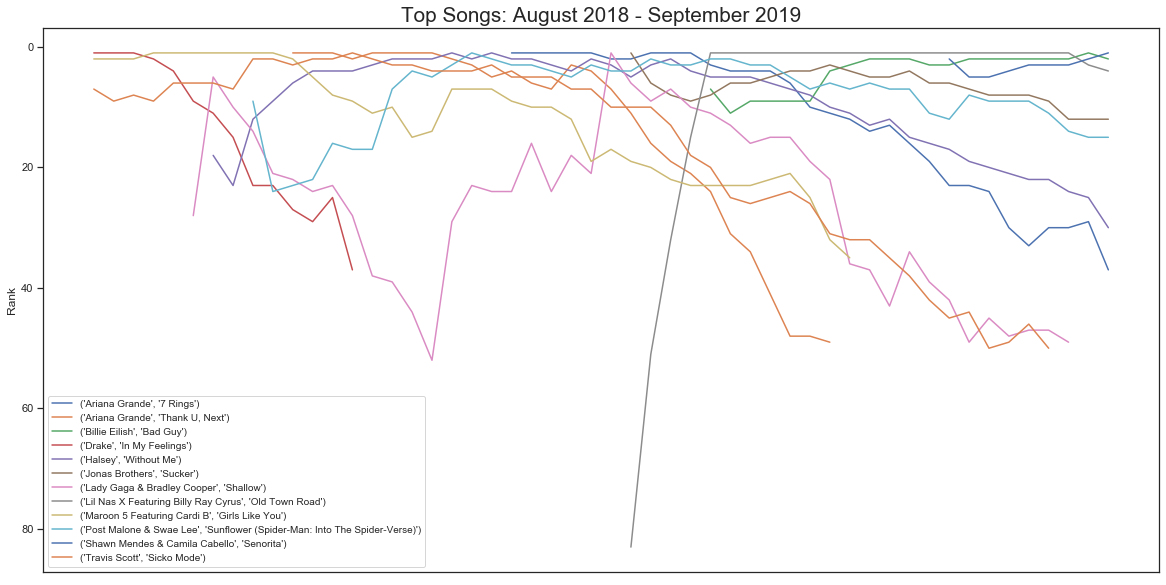

In [30]:
#Plotting songs for Top Songs in Aug 2018 - Sep 2019
plt.figure(figsize=(20,10))
for key, df in wasrankone_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small')
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2018 - September 2019', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Save and display chart
plt.savefig("../Resources/topsongsaug18_sep19.png", bbox_inches='tight')
plt.show()

ANALYSIS:
In this graph we observe 12 songs and its movement from its starting position on the Hot-100 chart until it exits the chart. We see that most of the top songs stay between rank 1 and high 40s. For Drake's 'In My Feelings' the song had a strong start but plummeted from its No.1 spot pretty quickly. As for 'Old Town Road,' the song entered the billboard charts from a low ranking and quickly reached No.1 and remained there for 24 weeks. 'Old Town Road' is considered a mix of two genres country and hip-hop.  

In [31]:
# 3 Year dataset
bb3_df = bb3_df[(bb3_df['date'] > '2016-09-01') & (bb3_df['date'] < '2018-08-05')]
bb3_df = pd.DataFrame(bb3_df)
bb3_df

,Unnamed: 0,artist,title,lastPos,rank,weeks,date
5600,0,Drake,In My Feelings,1,1,4,2018-08-04
5601,1,"Cardi B, Bad Bunny & J Balvin",I Like It,2,2,16,2018-08-04
5602,2,Maroon 5 Featuring Cardi B,Girls Like You,3,3,9,2018-08-04
5603,3,6ix9ine Featuring Nicki Minaj & Murda Beatz,FEFE,0,4,1,2018-08-04
5604,4,Post Malone,Better Now,7,5,13,2018-08-04
...,...,...,...,...,...,...,...
15595,95,Frank Ocean,Solo,0,96,1,2016-09-10
15596,96,Lil Uzi Vert,You Was Right,92,97,7,2016-09-10
15597,97,Frank Ocean,Nights,0,98,1,2016-09-10
15598,98,William Michael Morgan,I Met A Girl,0,99,1,2016-09-10


In [32]:
#Defining a function to look for songs ranked #1
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None

In [33]:
#Groupby artist and title in order to determine groups
bb3_df['date'] = bb3_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb3_df.groupby(['artist','title'])
rankone_df = gb_songtitle.apply(single)
rankone_df = rankone_df.dropna()
rankone_df = rankone_df.groupby(['artist','title'])

rankone_df.size()

artist                                                                   title                     
Bruno Mars                                                               That's What I Like            51
Camila Cabello Featuring Young Thug                                      Havana                        45
Cardi B                                                                  Bodak Yellow (Money Moves)    34
Cardi B, Bad Bunny & J Balvin                                            I Like It                     16
Childish Gambino                                                         This Is America               12
DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne  I'm The One                   22
Drake                                                                    God's Plan                    27
                                                                         In My Feelings                 4
                                                    

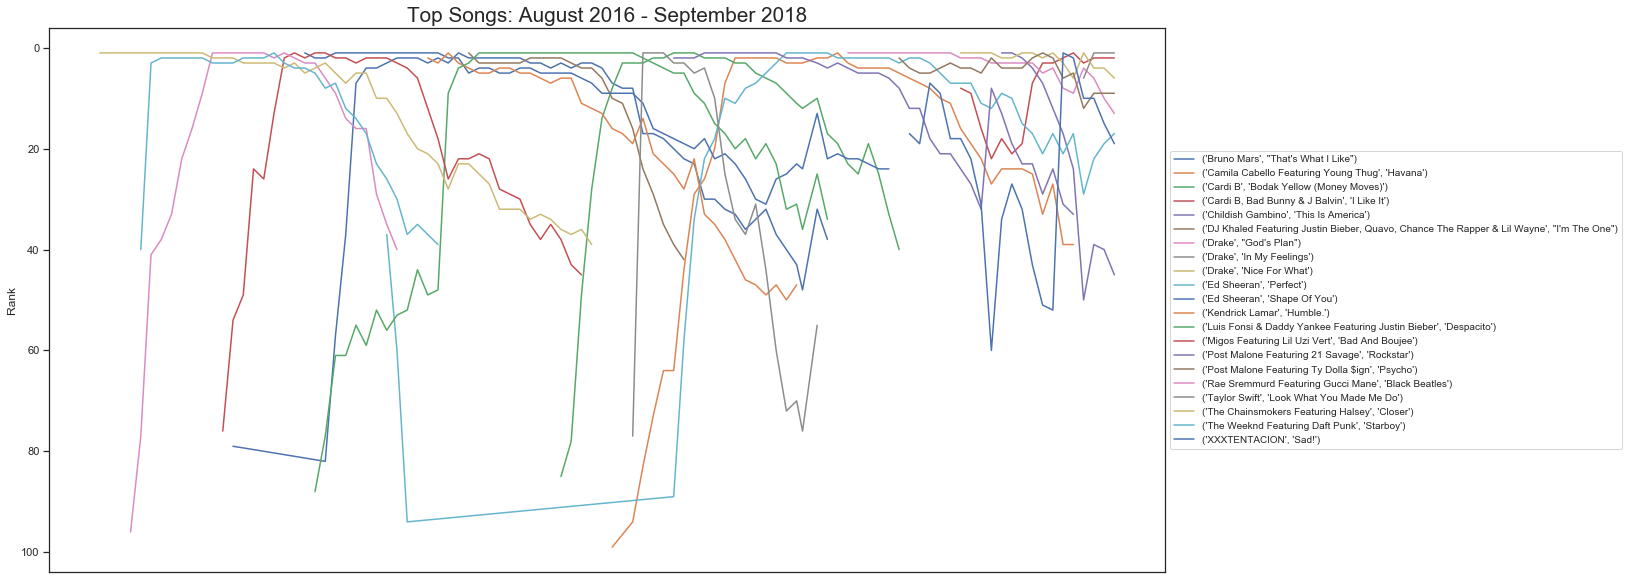

In [34]:
#Plotting songs for Top Songs in Aug 2016 - Sep 2018
plt.figure(figsize=(20,10))
for key, df in rankone_df:
    plt.plot(df['date'], df['rank'], label=key)

plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2016 - September 2018', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Save and display chart
plt.savefig("../Resources/topsongsaug18_sep16.png", bbox_inches='tight')
plt.show()

ANALYSIS:
This graph displays the top songs for the course of 2 years. Due to its longer year range, there are more top songs that can be observed. Most of these songs are categorized in the pop, rap and hip-hop genre (particularly in this graph most songs are either rap/hip-hop). 'Despacito'(genre: latin pop) stayed at No.1 the longest compared to other songs. Ed Sheeran's 'Perfect', began in the low 40s, plummeted to high 90s but suddenly climbed back up and stayed at the No.1 spot for 6 weeks.   

In [35]:
#5 Year Dataset
bb5_df = bb5_df[(bb5_df['date'] > '2014-09-05') & (bb5_df['date'] < '2016-08-10')]
bb5_df = pd.DataFrame(bb5_df)
bb5_df

,Unnamed: 0,artist,title,lastPos,rank,weeks,date
16000,0,Sia Featuring Sean Paul,Cheap Thrills,3,1,23,2016-08-06
16001,1,Drake Featuring WizKid & Kyla,One Dance,1,2,16,2016-08-06
16002,2,Calvin Harris Featuring Rihanna,This Is What You Came For,4,3,12,2016-08-06
16003,3,Justin Timberlake,Can't Stop The Feeling!,2,4,11,2016-08-06
16004,4,The Chainsmokers Featuring Daya,Don't Let Me Down,5,5,23,2016-08-06
...,...,...,...,...,...,...,...
25995,95,Usher,Good Kisser,91,96,17,2014-09-13
25996,96,TeeFLii Featuring 2 Chainz,24 Hours,0,97,1,2014-09-13
25997,97,Chris Young,Who I Am With You,95,98,19,2014-09-13
25998,98,Trey Songz,Foreign,98,99,9,2014-09-13


In [36]:
#Defining a function to look for songs ranked #1
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None


In [37]:
#Groupby artist and title in order to determine groups
bb5_df['date'] = bb5_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb5_df.groupby(['artist','title'])
rankone5_df = gb_songtitle.apply(single)
rankone5_df = rankone5_df.dropna()
rankone5_df = rankone5_df.groupby(['artist','title'])

rankone5_df.size()

artist                                 title                  
Adele                                  Hello                      26
Desiigner                              Panda                      22
Drake Featuring WizKid & Kyla          One Dance                  16
Justin Bieber                          Love Yourself              36
                                       Sorry                      39
                                       What Do You Mean?          31
Justin Timberlake                      Can't Stop The Feeling!    11
Mark Ronson Featuring Bruno Mars       Uptown Funk!               56
Meghan Trainor                         All About That Bass        40
OMI                                    Cheerleader                35
Rihanna Featuring Drake                Work                       26
Sia Featuring Sean Paul                Cheap Thrills              23
Taylor Swift                           Blank Space                36
                                       S

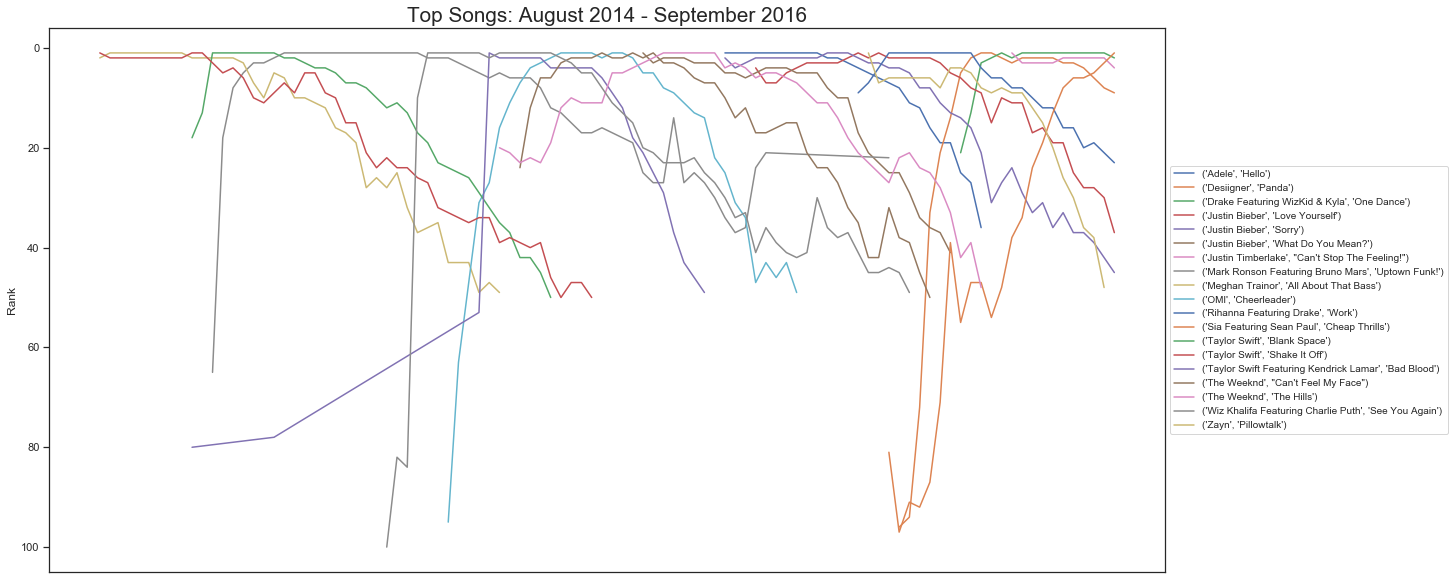

In [38]:
#Plotting songs for Top Songs in Aug 2014 - Sep 2016
plt.figure(figsize=(20,10))
for key, df in rankone5_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2014 - September 2016', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')

#Save and display chart
plt.savefig("../Resources/topsongsaug16_sep14.png", bbox_inches='tight')
plt.show()

ANALYSIS:
In this graph we see again another shift in top charting genres. There are more hip-hop and pop songs in this graph rather than the previous one that leaned more towards rap and hip-hop. Zayn's 'Pillowtalk' debuted at No.1 but quickly descended after one week. However, 'Pillowtalk' is not within the usual pop/rap/hip-hop genre. It is categorized as Alternative R&B and electronic. 'Uptown Funk' was the longest song in the No.1 spot even with its mix of funk and pop genre. It got replaced with 'See You Again' which is categorized as a mix of the pop and rap genre. 

CONCLUSION:
From the 3 graphs obtained from Billboard's Hot-100 chart, it is evident that Pop, Hip-Hop and Rap are the most dominating genres throughout 2014-2019. However, it is undeniable that Pop is the top genre for all 5 years. This confirms our spotify popular genre analysis that exhibit Pop as the leading genre with a 20.9% score. Hip-hop and Rap follow behind with 20% and 20.5%.  

# Conlcusions
